In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 10000
incomes = np.random.uniform(30000, 200000, num_samples)
deductions = np.random.uniform(1000, 30000, num_samples)
investment_incomes = np.random.uniform(0, 50000, num_samples)
tax_rates = np.random.uniform(0.1, 0.4, num_samples)
final_tax_amounts = (incomes - deductions + investment_incomes) * tax_rates

# Create the DataFrame
data = pd.DataFrame({
    'Income': incomes,
    'Deductions': deductions,
    'Investment_Income': investment_incomes,
    'Tax_Rate': tax_rates,
    'Final_Tax_Amount': final_tax_amounts
})

# Save to CSV
data.to_csv('synthetic_tax_strategy_data.csv', index=False)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('synthetic_tax_strategy_data.csv')


In [4]:
# Display the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Information about data types and missing values
print(data.info())


          Income    Deductions  Investment_Income  Tax_Rate  Final_Tax_Amount
0   93671.820204  11835.583736       36499.915549  0.291443      34488.286998
1  191621.432090  10654.450791        9225.599780  0.237788      45225.463270
2  154438.970108   6108.463463       17331.984718  0.389350      64500.617700
3  131771.942313  18610.733433       33164.031843  0.165694      24245.146438
4   56523.168875  14822.100655       24104.467226  0.276357      18185.815411
              Income    Deductions  Investment_Income      Tax_Rate  \
count   10000.000000  10000.000000       10000.000000  10000.000000   
mean   114007.124806  15631.366424       25002.519729      0.249614   
std     48897.121510   8389.541970       14338.687865      0.086698   
min     30001.977908   1004.574593           2.406195      0.100002   
25%     71875.907723   8364.428243       12687.395557      0.174057   
50%    113729.864952  15671.006519       25103.404733      0.250009   
75%    155801.079209  22937.897421 

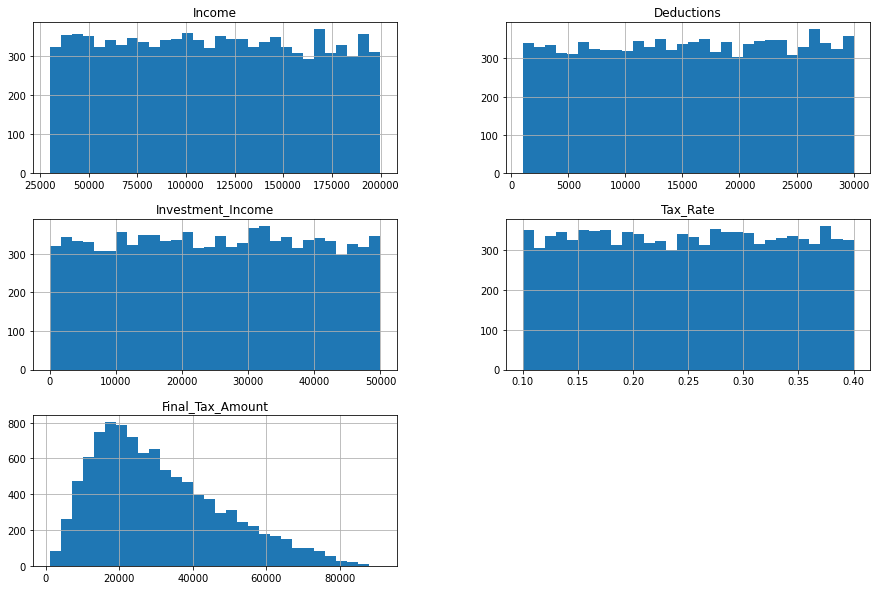

In [5]:
# Histograms
data.hist(bins=30, figsize=(15, 10))
plt.show()


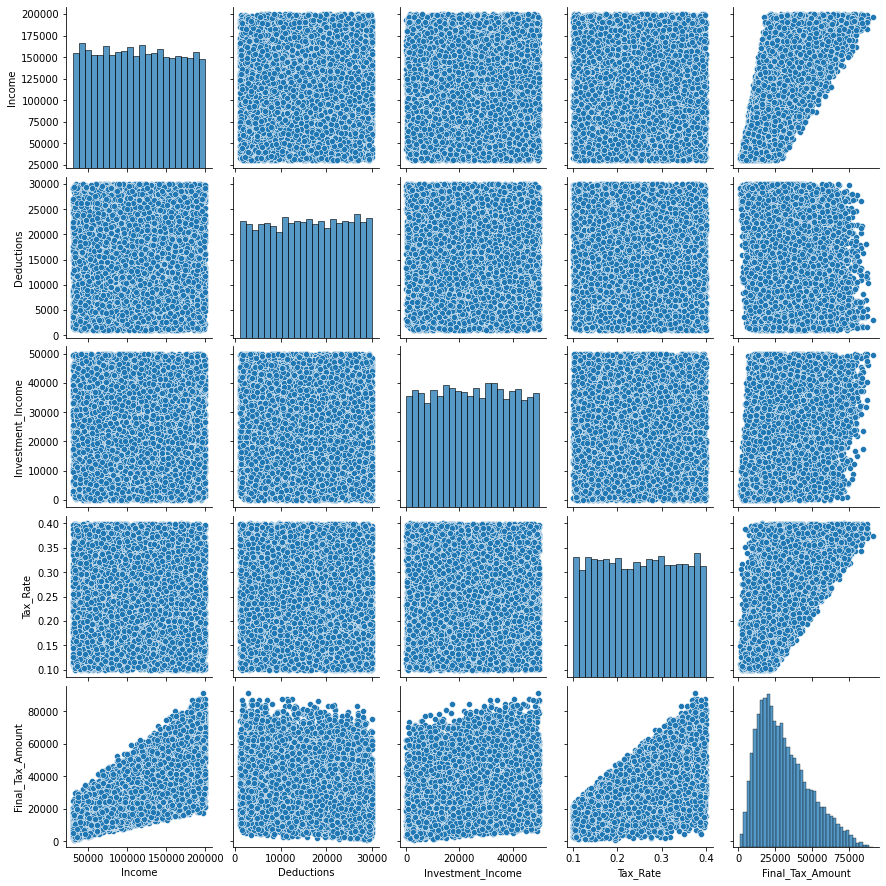

In [6]:
sns.pairplot(data)
plt.show()


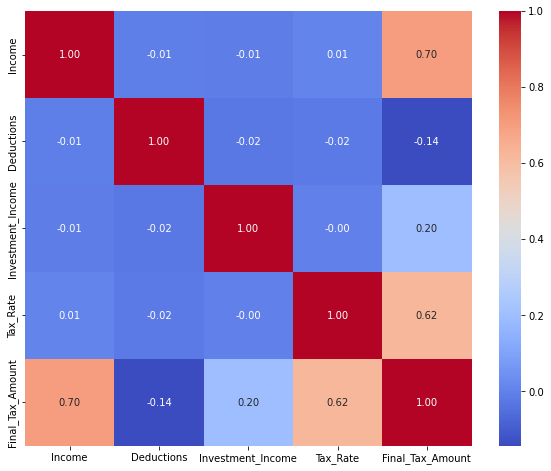

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


C:\Users\ap550\anaconda3\envs\pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ap550\anaconda3\envs\pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ap550\anaconda3\envs\pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

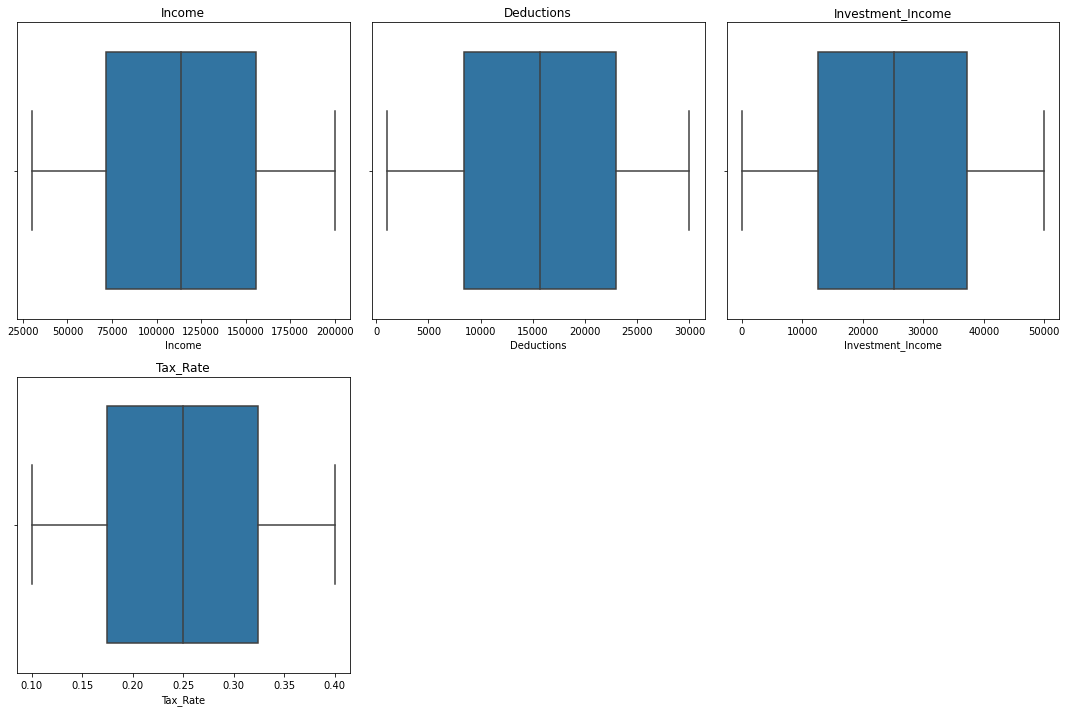

In [8]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [10]:
from sklearn.model_selection import train_test_split

X = scaled_data[:, :-1]  # Features
y = scaled_data[:, -1]   # Target variable (Final_Tax_Amount)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_nn = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model_nn.evaluate(X_test, y_test)
print(f'Neural Network - Loss: {loss}, MAE: {mae}')


Epoch 1/50
200/200 [==============================] - 3s 6ms/step - loss: 0.0793 - mae: 0.1450 - val_loss: 0.0043 - val_mae: 0.0509
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0034 - mae: 0.0452 - val_loss: 0.0030 - val_mae: 0.0416
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0027 - mae: 0.0394 - val_loss: 0.0025 - val_mae: 0.0387
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0021 - val_mae: 0.0358
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0018 - mae: 0.0327 - val_loss: 0.0018 - val_mae: 0.0323
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0015 - mae: 0.0300 - val_loss: 0.0015 - val_mae: 0.0297
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0273 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 8/50
200/200 [==============================] - 1s 4ms/step - loss: 0.

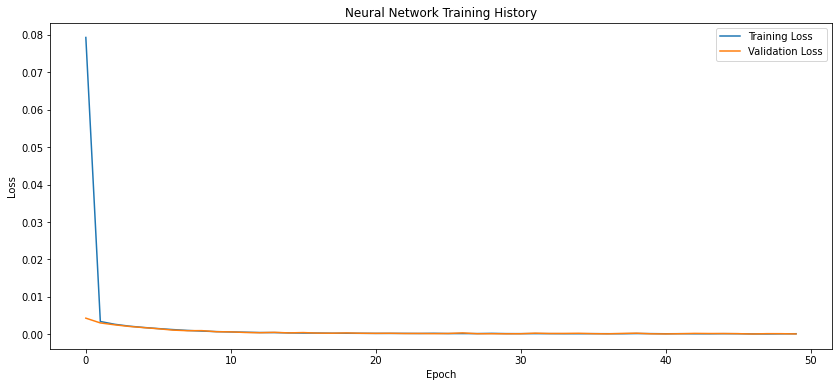

In [12]:
# Plot training and validation loss
plt.figure(figsize=(14, 6))
plt.plot(history_nn.history['loss'], label='Training Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
